# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.068405e+01     7.473877e+00
 * time: 0.004585981369018555
     1     2.875985e+01     6.225526e+00
 * time: 0.013888835906982422
     2     2.485722e+01     9.941364e+00
 * time: 0.07479500770568848
     3     1.415284e+01     2.280556e+00
 * time: 0.10130596160888672
     4     1.305206e+01     2.413680e+00
 * time: 0.11786484718322754
     5     1.204064e+01     1.846784e+00
 * time: 0.1341559886932373
     6     1.057111e+01     1.433523e+00
 * time: 0.15034890174865723
     7     1.013562e+01     1.747514e+00
 * time: 0.1666250228881836
     8     9.733598e+00     9.628315e-01
 * time: 0.18261504173278809
     9     9.366004e+00     9.722948e-01
 * time: 0.19878888130187988
    10     9.185844e+00     8.222160e-01
 * time: 0.21507596969604492
    11     9.049656e+00     6.046532e-01
 * time: 0.23162388801574707
    12     8.979126e+00     5.376082e-01
 * time: 0.24439287185668945
    13     8.916894e+00     3.240047e-01
 * time:

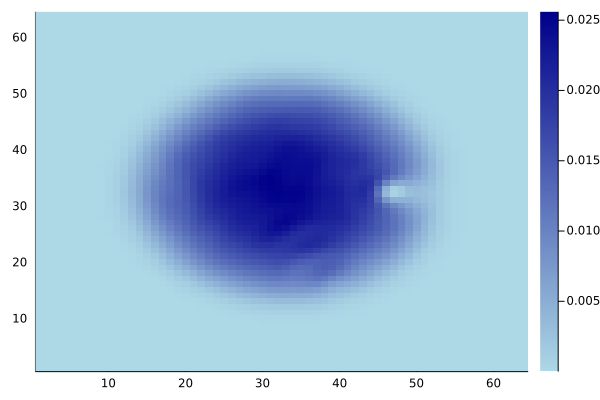

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)